<a href="https://colab.research.google.com/github/LongNguyen1984/DeepLearning/blob/master/IterativeImputer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv', header = None, na_values='?')

In [2]:
# summarize the first few rows
print(df.head())

    0   1        2     3      4     5    6   ...   21   22  23     24  25  26  27
0  2.0   1   530101  38.5   66.0  28.0  3.0  ...  NaN  2.0   2  11300   0   0   2
1  1.0   1   534817  39.2   88.0  20.0  NaN  ...  2.0  3.0   2   2208   0   0   2
2  2.0   1   530334  38.3   40.0  24.0  1.0  ...  NaN  1.0   2      0   0   0   1
3  1.0   9  5290409  39.1  164.0  84.0  4.0  ...  5.3  2.0   1   2208   0   0   1
4  2.0   1   530255  37.3  104.0  35.0  NaN  ...  NaN  2.0   2   4300   0   0   2

[5 rows x 28 columns]


In [5]:

# count missing values
for i in range(df.shape[1]):
  n_miss = df[[i]].isnull().sum()
  perc = n_miss/df.shape[0]
  print('> %d Missing: %d (%.1f%%)' %(i, n_miss, perc))

> 0 Missing: 1 (0.0%)
> 1 Missing: 0 (0.0%)
> 2 Missing: 0 (0.0%)
> 3 Missing: 60 (0.2%)
> 4 Missing: 24 (0.1%)
> 5 Missing: 58 (0.2%)
> 6 Missing: 56 (0.2%)
> 7 Missing: 69 (0.2%)
> 8 Missing: 47 (0.2%)
> 9 Missing: 32 (0.1%)
> 10 Missing: 55 (0.2%)
> 11 Missing: 44 (0.1%)
> 12 Missing: 56 (0.2%)
> 13 Missing: 104 (0.3%)
> 14 Missing: 106 (0.4%)
> 15 Missing: 247 (0.8%)
> 16 Missing: 102 (0.3%)
> 17 Missing: 118 (0.4%)
> 18 Missing: 29 (0.1%)
> 19 Missing: 33 (0.1%)
> 20 Missing: 165 (0.6%)
> 21 Missing: 198 (0.7%)
> 22 Missing: 1 (0.0%)
> 23 Missing: 0 (0.0%)
> 24 Missing: 0 (0.0%)
> 25 Missing: 0 (0.0%)
> 26 Missing: 0 (0.0%)
> 27 Missing: 0 (0.0%)


# Iterative Imputation With InterativeImputer

In [12]:
from numpy import isnan
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# load dataset
df = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv', header=None, na_values='?')
data = df.values
# split data into input and output
ix = [i for i in range(data.shape[1]) if i!= 23]
X, y = data[:,ix], data[:,23]
# summarize total missing
print('Missing: %d' % sum(isnan(X).flatten()))
# define imputeter
imputer = IterativeImputer()
# fit the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)
# summarize total missing
print('Missing: %d' %sum(isnan(Xtrans).flatten()))

Missing: 1605
Missing: 0


# IterativeImputer and Model Evaluation

In [17]:
from pandas import read_csv
from numpy import mean
from numpy import std
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
# load dataset
df = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv', header = None, na_values='?')
data = df.values
# split data into input and output
ix =[i for i in range(data.shape[1]) if i!=23]
X, y = data[:,ix], data[:,23]
# define the modeling 
model = RandomForestClassifier()
imputer = IterativeImputer()
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
# define model evaluation
cv= RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy',cv=cv, n_jobs=-1)
# print outcome
print('Mean Accuarcy: %.3f (%.3f)'% (mean(scores),std(scores)))

Mean Accuarcy: 0.863 (0.050)


# IterativeImputer and Different Imputation Order

>ascending 0.871 (0.054)
>descending 0.867 (0.053)
>roman 0.872 (0.054)
>arabic 0.869 (0.052)
>random 0.870 (0.053)


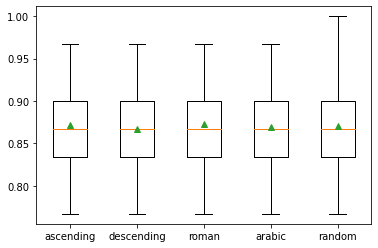

In [21]:
# evaluation of imputer with different strategies: ascending, decending, right-to-left(Arabic)
# left-to-right(Roman) and random
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
df = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv', header=None, na_values='?')
data = df.values
# split data into input and output elements
ix = [i for i in range(data.shape[1]) if i!=23]
X, y = data[:,ix], data[:,23]
# evaluate each strategy on the dataset
results = list()
strategies = ['ascending', 'descending','roman','arabic','random']
for s in strategies:
  # define model pipling
  pipeline = Pipeline(steps=[('i',IterativeImputer(imputation_order=s)),('m',RandomForestClassifier())])
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(pipeline,X,y,scoring='accuracy',cv=cv, n_jobs=-1)
  # store results
  results.append(scores)
  print('>%s %.3f (%.3f)'% (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()


# IterativeImputer and Different Number of Iterations

>1 0.869 (0.050)
>2 0.873 (0.052)
>3 0.872 (0.060)
>4 0.869 (0.056)
>5 0.869 (0.054)
>6 0.867 (0.054)
>7 0.872 (0.050)
>8 0.873 (0.053)
>9 0.870 (0.055)
>10 0.876 (0.052)
>11 0.880 (0.048)
>12 0.871 (0.055)
>13 0.871 (0.056)
>14 0.867 (0.049)
>15 0.873 (0.055)
>16 0.872 (0.052)
>17 0.867 (0.052)
>18 0.872 (0.056)
>19 0.876 (0.054)
>20 0.874 (0.048)


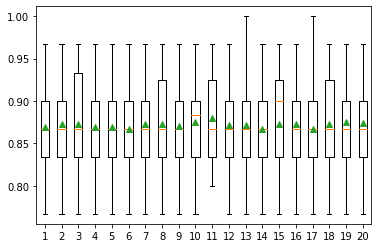

In [23]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
df = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv', header=None, na_values='?')
data = df.values
# split data into input and output elements
ix = [i for i in range(data.shape[1]) if i !=23]
X, y = data[:, ix], data[:,23]
# evaluate each strategy on the dataset
strategies = [str(i) for i in range(1,21)]
results = list()
for s in strategies:
  # create the modeling pipline
  pipeline = Pipeline(steps=[('i',IterativeImputer(max_iter=int(s))),('m',RandomForestClassifier())])
  # evaluate the model
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(pipeline,X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  #store results
  results.append(scores)
  print('>%s %.3f (%.3f)'% (s, mean(scores),std(scores)))
# plot model performance for comparision
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()


# IterativeImputer Transoform When Making a Prediction

In [24]:
from numpy import nan
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
# load the dataset
df = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv', header=None, na_values='?')
data = df.values
# split data into input and output elements
ix = [i for i in range(data.shape[1]) if i!=23]
X, y = data[:,ix], data[:,23]
# create the modeling pipeline
pipeline=Pipeline(steps=[('i',IterativeImputer()),('m', RandomForestClassifier())])
# fit the model
pipeline.fit(X, y)
# define new data
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, nan, 2, 5, 4, 4, nan, nan, nan, 3, 5, 45.00,
8.40, nan, nan, 2, 11300, 00000, 00000, 2]
# make prediction
yhat = pipeline.predict([row])
# summarize the prediction
print('Predicted Class: %d' %yhat[0])

Predicted Class: 2
